<a href="https://colab.research.google.com/github/vikaschaudhary53/Book-Recommendation-System/blob/main/Book_Recommendation_System_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
books_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Unsupervised Machine Learning - Vikas Chaudhary/data_book_recommendation/Books.csv')
ratings_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Unsupervised Machine Learning - Vikas Chaudhary/data_book_recommendation/Ratings.csv')
users_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Unsupervised Machine Learning - Vikas Chaudhary/data_book_recommendation/Users.csv')

In [4]:
books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [5]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
books_df.shape

(271360, 8)

####Get the required columns in 'book_df'

In [7]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [8]:
#select the columns that we need
books_df = books_df[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]

In [9]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [10]:
#Rename columns
books_df.rename(columns={'Book-Title':'title', 'Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'}, inplace=True)

In [11]:
books_df.head()

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [12]:
books_df.dropna(inplace = True)
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271357 non-null  object
 1   title      271357 non-null  object
 2   author     271357 non-null  object
 3   year       271357 non-null  object
 4   publisher  271357 non-null  object
dtypes: object(5)
memory usage: 12.4+ MB


###Know about the users

In [13]:
users_df

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [14]:
users_df.shape

(278858, 3)

In [15]:
#renaming all the columns to small case
users_df.rename(columns={'User-ID':'user_id','Location':'location','Age':'age'}, inplace=True)

In [16]:
users_df.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [17]:
users_df

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [18]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


###Know about ratings dataframe

In [19]:
ratings_df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [20]:
ratings_df.shape

(1149780, 3)

In [21]:
#Rename the columns
ratings_df.rename(columns={'User-ID':'user_id','Book-Rating':'rating'}, inplace=True)

In [22]:
ratings_df.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


####Filtering on the basis of:
1. Book at least has the ratings by 50 readers.
2. Reader at least has rated 200 books.

In [23]:
ratings_df['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [24]:
ratings_df['user_id'].value_counts().shape

(105283,)

In [25]:
#keeping users with at least rating more than 200
ratings_df['user_id'].value_counts()>200

11676      True
198711     True
153662     True
98391      True
35859      True
          ...  
116180    False
116166    False
116154    False
116137    False
276723    False
Name: user_id, Length: 105283, dtype: bool

In [26]:
x=ratings_df['user_id'].value_counts()>200

In [27]:
x[x].shape

(899,)

In [28]:
y=x[x].index

In [29]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [30]:
ratings_df=ratings_df[ratings_df['user_id'].isin(y)]

In [31]:
ratings_df

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


###Joining 'ratings_df' with 'books_df'

In [32]:
books_rating = ratings_df.merge(books_df, on='ISBN')

In [33]:
books_rating

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
...,...,...,...,...,...,...,...
487664,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom
487665,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA)
487666,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim"
487667,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann


In [34]:
number_rating=books_rating.groupby('title')['rating'].count().reset_index()

In [35]:
number_rating

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160263,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160264,Ã?Â?lpiraten.,1
160265,Ã?Â?rger mit Produkt X. Roman.,1
160266,Ã?Â?stlich der Berge.,1


In [36]:
number_rating.rename(columns={'rating':'number_of_ratings'}, inplace=True)

In [37]:
number_rating

,title,number_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160263,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160264,Ã?Â?lpiraten.,1
160265,Ã?Â?rger mit Produkt X. Roman.,1
160266,Ã?Â?stlich der Berge.,1


In [165]:
#joining the rating with title
final_rating = books_rating.merge(number_rating, on='title')

In [166]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
487664,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom,1
487665,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),1
487666,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",1
487667,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,1


In [167]:
final_rating = final_rating[final_rating['number_of_ratings']>50]

In [168]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83


In [169]:
final_rating.isna().sum()

user_id              0
ISBN                 0
rating               0
title                0
author               0
year                 0
publisher            0
number_of_ratings    0
dtype: int64

In [170]:
final_rating.isnull().sum()

user_id              0
ISBN                 0
rating               0
title                0
author               0
year                 0
publisher            0
number_of_ratings    0
dtype: int64

In [171]:
final_rating.describe()

,user_id,rating,number_of_ratings
count,59903.000000,59903.000000,59903.000000
mean,140727.330985,2.012620,102.562326
std,80777.459046,3.570031,51.926142
min,254.000000,0.000000,51.000000
25%,70052.000000,0.000000,65.000000
50%,140358.000000,0.000000,84.000000
75%,212923.000000,3.000000,123.000000
max,278418.000000,10.000000,363.000000


In [172]:
booksWithNoYear = list(final_rating[final_rating['year'] == 0]['title'].value_counts().keys())

In [173]:
len(booksWithNoYear)

29

In [174]:
final_rating['year'].value_counts(ascending = False)[:50]

2002    7125
1999    5984
2001    5221
2000    4497
1998    4326
2003    4255
1996    3969
1997    3671
1994    3042
1995    2849
1993    2375
1992    2190
2004    1400
1990    1385
1989    1237
1991    1100
1986    1037
1987     917
1988     756
1984     477
1983     389
1985     314
1982     265
0        193
1976     151
1978     143
1959     116
1981      76
1979      68
1974      68
1980      43
1968      28
1975      22
2001      20
1999      18
2000      17
1993      12
2002      11
1995       9
2003       8
1998       8
1977       7
1992       7
1996       7
1994       6
1961       6
1960       6
1962       6
1997       5
0          5
Name: year, dtype: int64

29 books have some 'year' 0, so we can drop those entries.

In [175]:
final_rating = final_rating[final_rating['year'] != 0]
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83


In [176]:
final_rating[final_rating['year'] == '0']

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
4672,164533,B00008WFXL,0,The Da Vinci Code,Dan Brown,0,Doubleday,224
35307,247429,073940086X,0,Mirror Image,Danielle Steel,0,Delacorte Press,72
104032,225087,0340625880,0,Sanctuary,Nicholas Luard,0,Trafalgar Square,78
109491,11676,1568657587,2,N Is for Noose,Sue Grafton,0,Bantam Doubleday Dell,75
164240,245827,0842319662,0,Journey,Myrna Grant,0,Tyndale House Publishers,68


Since all the above books have 0 ratings, we will drop them.

In [177]:
final_rating = final_rating[final_rating['year'] != '0']
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83


In [178]:
#validatae if there are any unusual values in 'year' column
final_rating['year'] = final_rating['year'].astype(int)
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83


In [179]:
#check if 0 is still present in the dataframe
final_rating[final_rating['year']>1]

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83


In [180]:
final_rating['year'].value_counts().sort_index()

1920       2
1943       4
1948       3
1951       2
1956       4
1959     117
1960       6
1961       6
1962       6
1968      28
1969       1
1971       4
1973       1
1974      68
1975      23
1976     151
1977      10
1978     143
1979      69
1980      48
1981      77
1982     267
1983     391
1984     478
1985     315
1986    1038
1987     918
1988     759
1989    1240
1990    1387
1991    1105
1992    2197
1993    2387
1994    3048
1995    2858
1996    3976
1997    3676
1998    4334
1999    6002
2000    4514
2001    5241
2002    7136
2003    4263
2004    1401
2010       1
Name: year, dtype: int64

In [181]:
#basic overview
print("Number of Books in final dataset:", len(final_rating.groupby(['title']).count()))
print("Number of Author in final dataset:", len(final_rating.groupby(['author']).count()))
print("Number of Publishers in final dataset:", len(final_rating.groupby(['publisher']).count()))


Number of Books in final dataset: 703
Number of Author in final dataset: 563
Number of Publishers in final dataset: 350


[]

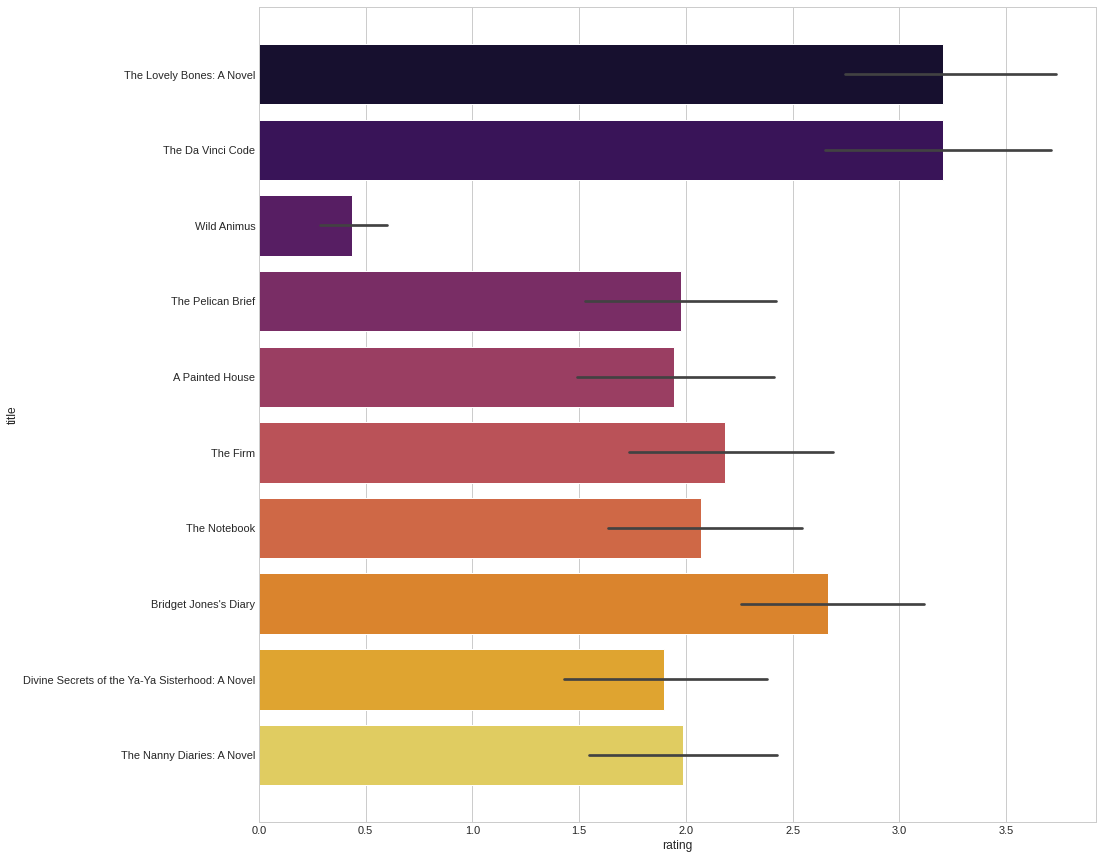

In [182]:
top_ten=final_rating[final_rating['number_of_ratings']>220]

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[15,15])
sns.barplot(x='rating', y='title', data=top_ten,palette='inferno')
plt.plot()

[]

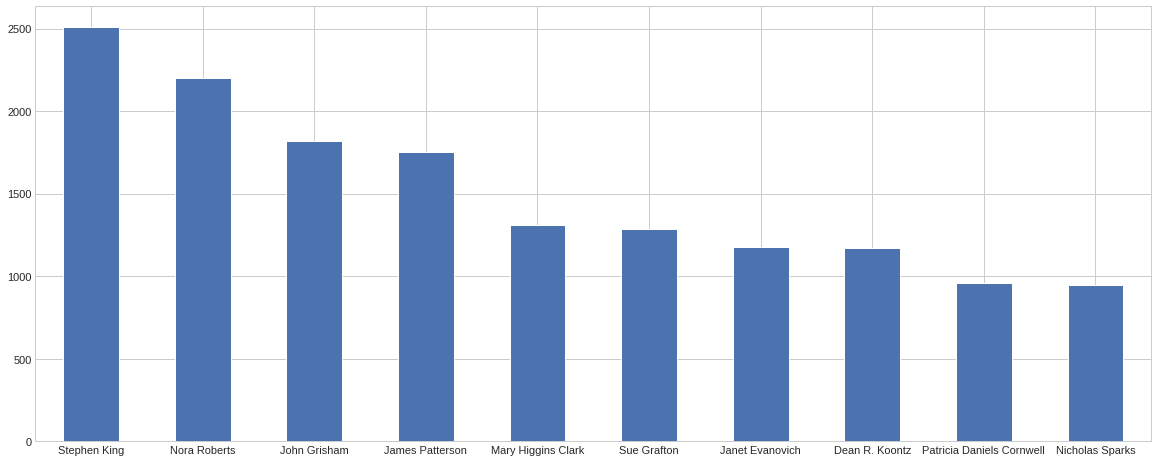

In [183]:
#top 10 authors with highest mentions
top10_mention = final_rating['author'].value_counts()[:10]
plt.figure(figsize=[20,8])
ax = top10_mention.plot.bar(x='lab', y='val', rot=0)
plt.plot()

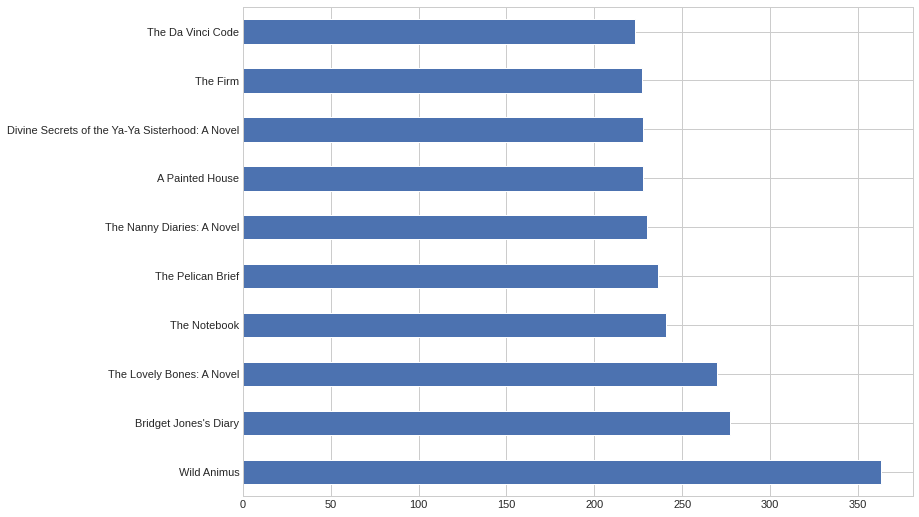

In [184]:
#top 10 books that received ratings with highest mentions
plt.figure(figsize=[12,9])
ax = final_rating['title'].value_counts()[:10].plot.barh()

In [185]:
top_rated=final_rating[final_rating['rating']==10]

[]

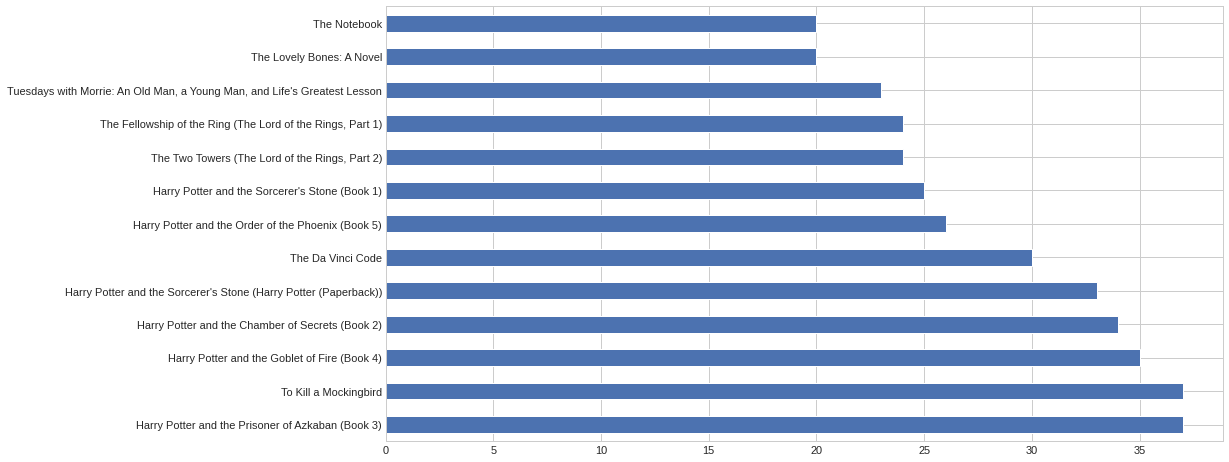

In [186]:
#top books that received 10-rating at least 20 times
plt.figure(figsize=[15,8])
ax = top_rated['title'].value_counts()[:13].plot.barh(x='lab', y='val', rot=0)
plt.plot()

In [187]:
final_rating.head(3)

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82


In [188]:
print("The average rating of all the books is:", round(final_rating.groupby(['title']).mean()['rating'].sort_values(ascending = False).mean(), 2))

The average rating of all the books is: 1.98


In [189]:
#number of books above rating 3
meanRating_df = pd.DataFrame(final_rating.groupby(['title']).mean()['rating'].sort_values(ascending = False))

In [190]:
print("There are", len(meanRating_df[meanRating_df['rating']>3]), "books with rating above 3.")

There are 71 books with rating above 3.


In [191]:
meanRating_df = round(meanRating_df['rating'].sort_index(),1)

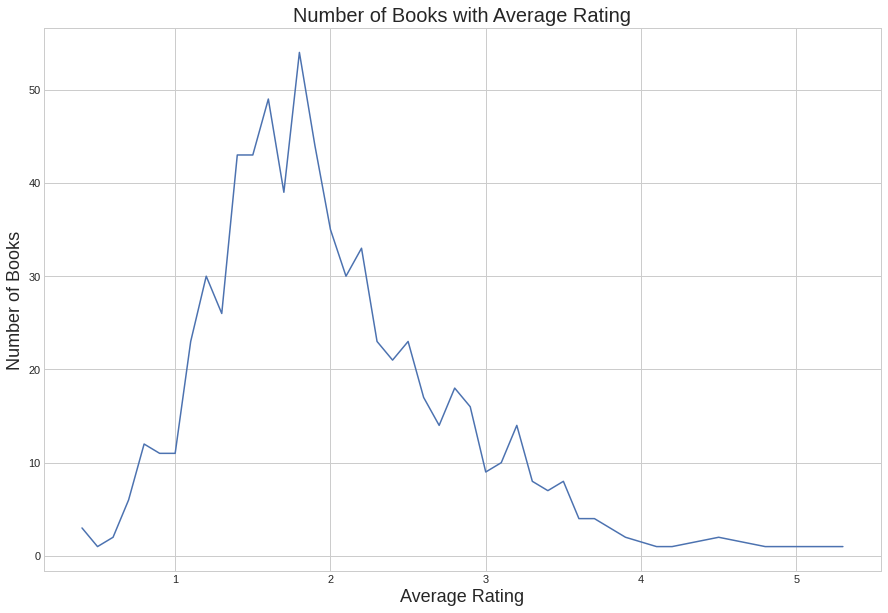

In [192]:
plt.figure(figsize=[15,10])
plt.plot(meanRating_df.value_counts().sort_index())
plt.title ('Number of Books with Average Rating', fontsize = 20)
plt.xlabel('Average Rating', fontsize = 18)
plt.ylabel('Number of Books', fontsize = 18)
plt.show()

In [193]:
len(top_rated['rating'].unique())
#top_rated=final_rating[final_rating['rating']==10]

1

In [194]:
len(top_rated['title'].unique())

653

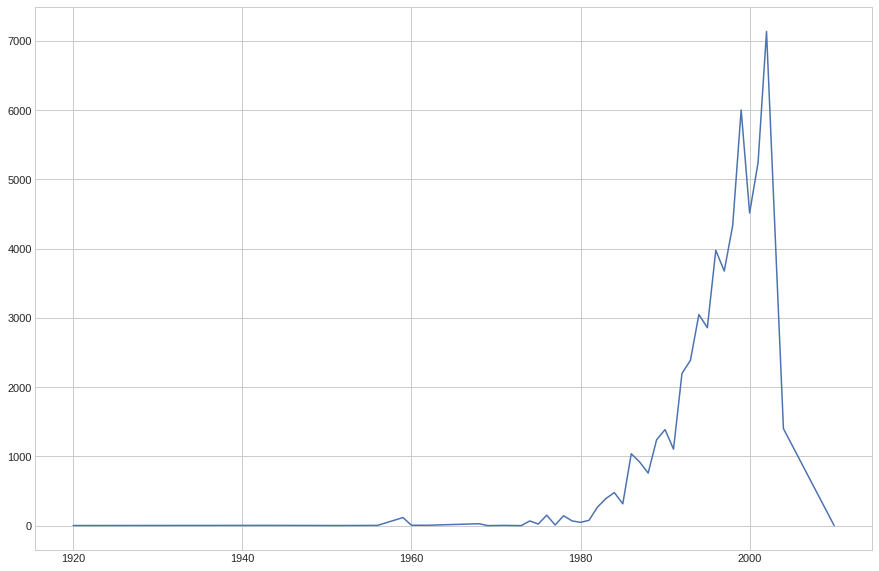

In [195]:
#year wise number of books published
plt.figure(figsize=[15,10])
plt.plot(final_rating['year'].value_counts().sort_index())
#plt.title ('Number of Books with Average Rating', fontsize = 20)
#plt.xlabel('Average Rating', fontsize = 18)
#plt.ylabel('Number of Books', fontsize = 18)
plt.show()

In [196]:
#number of authors mentions
final_rating['author'].value_counts()

Stephen King          2509
Nora Roberts          2200
John Grisham          1820
James Patterson       1751
Mary Higgins Clark    1309
                      ... 
Jim Debrosse             1
Terry Coleman            1
Patrick O'Leary          1
Jefferson Carter         1
Madeena S. Nolan         1
Name: author, Length: 563, dtype: int64

In [197]:
#converting all the authors name into the lowercase
final_rating['author'] = final_rating['author'].str.lower()
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,kerry tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,kerry tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,jennifer lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,jennifer lauck,2001,Simon &amp; Schuster Audio,83


In [198]:
final_rating[final_rating['title'] == "When the Wind Blows"]

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
15869,277478,0446607657,0,When the Wind Blows,james patterson,1999,Warner Vision,175
15870,2276,0446607657,0,When the Wind Blows,james patterson,1999,Warner Vision,175
15871,11676,0446607657,0,When the Wind Blows,james patterson,1999,Warner Vision,175
15872,16795,0446607657,9,When the Wind Blows,james patterson,1999,Warner Vision,175
15873,23768,0446607657,0,When the Wind Blows,james patterson,1999,Warner Vision,175
...,...,...,...,...,...,...,...,...
16039,56399,0140094199,10,When the Wind Blows,raymond briggs,1982,Penguin USA,175
16040,122881,0140094199,0,When the Wind Blows,raymond briggs,1982,Penguin USA,175
16041,88283,0446676438,0,When the Wind Blows,james patterson,2000,Warner Books,175
16042,125519,0446676438,9,When the Wind Blows,james patterson,2000,Warner Books,175


In [199]:
final_rating[final_rating['title']=="When the Wind Blows"]['author'].value_counts()

james patterson     134
john saul            15
zachary alan fox      7
judith marshall       3
raymond briggs        2
Name: author, dtype: int64

In [200]:
#creating a ISBN and author
author_book_dict = dict(zip(final_rating['ISBN'], final_rating['author']))
len(author_book_dict)

2106

In [203]:
author_book_dict.get('0446676438')

'james patterson'

In [204]:
#function to remove multiple form of the name of a single author for same book
def author_col(val):
  if val in author_book_dict.keys():
    return author_book_dict.get(val)


In [205]:
final_rating['author'] = final_rating['ISBN'].apply(author_col)

In [206]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,kerry tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,kerry tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,jennifer lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,jennifer lauck,2001,Simon &amp; Schuster Audio,83


In [211]:
#top 10 authors mentions
final_rating['author'].value_counts()[:10]

john grisham          2750
stephen king          2548
nora roberts          2200
james patterson       1751
sue grafton           1501
mary higgins clark    1353
danielle steel        1225
janet evanovich       1177
dean r. koontz        1170
michael crichton      1126
Name: author, dtype: int64

need to have a diagram in the above series

In [123]:
#get database based on individual authors
final_rating['author'].str.split(',', expand=True)

,0
0,james finn garner
1,james finn garner
2,james finn garner
3,james finn garner
4,james finn garner
...,...
228879,tami hoag
228880,tami hoag
228881,tami hoag
228882,tami hoag


In [124]:
final_rating[final_rating['title']=='When the Wind Blows']

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
15869,277478,0446607657,0,When the Wind Blows,james patterson,1999,Warner Vision,175
15870,2276,0446607657,0,When the Wind Blows,james patterson,1999,Warner Vision,175
15871,11676,0446607657,0,When the Wind Blows,james patterson,1999,Warner Vision,175
15872,16795,0446607657,9,When the Wind Blows,james patterson,1999,Warner Vision,175
15873,23768,0446607657,0,When the Wind Blows,james patterson,1999,Warner Vision,175
...,...,...,...,...,...,...,...,...
16038,55548,157566335X,0,When the Wind Blows,james patterson,1998,Kensington Publishing Corp.,175
16039,56399,0140094199,10,When the Wind Blows,james patterson,1982,Penguin USA,175
16040,122881,0140094199,0,When the Wind Blows,james patterson,1982,Penguin USA,175
16041,88283,0446676438,0,When the Wind Blows,james patterson,2000,Warner Books,175


In [79]:
#creating the dataframe for books and authors
book_author = final_rating.groupby('title')['author'].unique().reset_index()
book_author

,title,author
0,1984,[george orwell]
1,1st to Die: A Novel,[james patterson]
2,2nd Chance,[james patterson]
3,4 Blondes,[candace bushnell]
4,84 Charing Cross Road,[helene hanff]
...,...,...
698,Year of Wonders,[geraldine brooks]
699,You Belong To Me,[mary higgins clark]
700,Zen and the Art of Motorcycle Maintenance: An ...,[robert m. pirsig]
701,Zoya,[danielle steel]


In [80]:
 final_rating.groupby('author')['title'].unique().reset_index()

,author,title
0,a. manette ansay,[Vinegar Hill (Oprah's Book Club (Paperback))]
1,a.s. byatt,[Possession : A Romance]
2,adriana trigiani,[Big Cherry Holler: A Big Stone Gap Novel (Bal...
3,alan rodgers,[Night]
4,aldous huxley,[Brave New World]
...,...,...
321,william goldman,[The Princess Bride: S Morgenstern's Classic T...
322,wilson rawls,[Where the Red Fern Grows]
323,winston groom,[FORREST GUMP (Movie Tie in)]
324,yann martel,[Life of Pi]


This dataset has certain discripencies in 'author' name as some entries are in capital letters or some are in camel format, so we need to rectify this.

In [85]:
top_rated.groupby('title')['number_of_ratings'].count().reset_index()

,title,number_of_ratings
0,1984,11
1,1st to Die: A Novel,10
2,2nd Chance,7
3,84 Charing Cross Road,9
4,A Bend in the Road,3
...,...,...
648,Year of Wonders,5
649,You Belong To Me,2
650,Zen and the Art of Motorcycle Maintenance: An ...,2
651,Zoya,1


In [86]:
top_rated['number_of_ratings'].value_counts(ascending=True)

114      1
133      2
122      2
200      2
163      3
      ... 
78      76
81      96
183    104
53     106
62     107
Name: number_of_ratings, Length: 128, dtype: int64

In [87]:
top_rated[top_rated['number_of_ratings']>200]

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
1100,16795,0142001740,10,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,209
1108,29259,0142001740,10,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,209
1114,36606,0142001740,10,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,209
1124,55548,0142001740,10,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,209
1163,124363,0142001740,10,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,209
...,...,...,...,...,...,...,...,...
70145,273979,0312278586,10,The Nanny Diaries: A Novel,Emma McLaughlin,2002,St. Martin's Press,230
70161,36606,0312291639,10,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,230
70179,107301,0312291639,10,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,230
70198,160819,0312291639,10,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,230


In [88]:
final_rating.drop_duplicates(['user_id','title'], inplace=True)

In [89]:
final_rating.shape

(57776, 8)

###Pivot Table

In [90]:
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values='rating')

In [91]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [92]:
book_pivot.fillna(0, inplace=True)

In [93]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [95]:
type(book_sparse)

scipy.sparse.csr.csr_matrix

In [96]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')

In [97]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [98]:
np.where(book_pivot.index==237)

(array([], dtype=int64),)

In [99]:
distances, suggestions = model.kneighbors(book_pivot.iloc[356,:].values.reshape(1,-1), n_neighbors=6)

In [100]:
distances

array([[ 0.        , 13.67479433, 17.32050808, 17.34935157, 17.66352173,
        19.        ]])

In [101]:
suggestions

array([[356,  93, 305,   8, 173, 377]])

In [102]:
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['No Safe Place', 'Call of the Wild', 'Long After Midnight',
       'A Civil Action', 'Exclusive', 'Pleading Guilty'],
      dtype='object', name='title')


In [103]:
np.where(book_pivot.index=='Animal Farm')[0][0]

47

In [104]:
def book_recommendation(book_name):
  book_id = np.where(book_pivot.index==book_name)[0][0]
  distances, suggestions = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6)

  for i in range(len(suggestions)):
    # if i!=0:
      # print(book_pivot.index[suggestions[i]])
      print(i)

In [105]:
book_recommendation('Animal Farm')

0


In [106]:
def book_recommendation(book_name):
  book_id = np.where(book_pivot.index==book_name)[0][0]
  distances, suggestions = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6)

  for i in range(len(suggestions)):
    if i==0:
      print("The suggestions for", book_name, "are: ")
    if not i:
      print(book_pivot.index[suggestions[i]])

In [107]:
book_recommendation('Animal Farm')

The suggestions for Animal Farm are: 
Index(['Animal Farm', 'Exclusive', 'Call of the Wild', 'Jacob Have I Loved',
       'Pleading Guilty', 'No Safe Place'],
      dtype='object', name='title')


In [108]:
book_recommendation('Harry Potter and the Chamber of Secrets (Book 2)')

The suggestions for Harry Potter and the Chamber of Secrets (Book 2) are: 
Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')
